In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('2015_2019년도_화재.csv', encoding = 'cp949')

In [3]:
df['인명피해(명)소계']=df['사망']*10+df['부상'] # '1사망=10부상' 이라 하고 인명피해(명) 소계로 했습니다.
df.head()

,사망,부상,인명피해(명)소계,재산피해소계,화재발생년월일,시도,시군구,읍면동,화재유형,발화열원,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,장소대분류,장소중분류,장소소분류
0,0,0,0,2920,2015-01-01 0:01,경상남도,합천군,청덕면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,주거,단독주택,단독주택
1,0,0,0,0,2015-01-01 0:06,서울특별시,영등포구,여의도동,임야,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,기타,기타,임야,들불,기타 들불
2,0,0,0,137,2015-01-01 0:07,서울특별시,강남구,논현동,"자동차,철도차량","담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"침구,직물류","기타(침구,직물류)","자동차,철도차량",자동차,오토바이
3,0,0,0,326,2015-01-01 0:08,서울특별시,도봉구,쌍문동,"건축,구조물","담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"종이,목재,건초등","기타(종이,목재,건초등)","판매,업무시설",일반업무,일반빌딩
4,0,0,0,0,2015-01-01 0:11,부산광역시,연제구,연산동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,음식물,주거,공동주택,다세대주택


In [4]:
def split_blank(x):
    return x.split(' ')[0]
df.iloc[:,4].apply(split_blank)
df['화재발생년월일']= df.iloc[:,4].apply(split_blank)
df['화재발생년월일'] = pd.to_datetime(df['화재발생년월일'], format="%Y-%m-%d")
#화재발생년월일에서 시간은 필요 없을 것 같아 년월일만 남기고 제외했습니다.

In [5]:
df=df.sort_values('화재발생년월일') #화재발생년월일로 정렬했습니다.(이미 그렇게 정렬되어 있긴 해요)

In [6]:
del df['사망']
del df['부상']
df
#이제 필요 없는 칼럼인 사망과 부상을 없엤습니다.

,인명피해(명)소계,재산피해소계,화재발생년월일,시도,시군구,읍면동,화재유형,발화열원,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,장소대분류,장소중분류,장소소분류
0,0,2920,2015-01-01,경상남도,합천군,청덕면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,주거,단독주택,단독주택
93,0,2940,2015-01-01,강원도,춘천시,후평동,"건축,구조물","불꽃, 불티",굴뚝(연통) 아궁이,부주의,가연물 근접방치,"종이,목재,건초등","목재, 합판",주거,단독주택,단독주택
92,0,162,2015-01-01,강원도,강릉시,지변동,"건축,구조물",작동기기,기타(작동기기),부주의,기타(부주의),식품,튀김유,생활서비스,음식점,"치킨,족발"
91,0,91,2015-01-01,강원도,원주시,관설동,기타(쓰레기 화재등),작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,음식물,기타,야외,기타야외
90,0,364,2015-01-01,전라북도,순창군,쌍치면,"건축,구조물","불꽃, 불티","기타(불꽃,불티)",부주의,"불씨,불꽃,화원방치","종이,목재,건초등",나무,주거,단독주택,단독주택
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214372,0,130914,2019-12-31,경기도,안성시,미양면,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",산업시설,동식물시설,농예용 온실
214371,0,22,2019-12-31,인천광역시,계양구,임학동,"건축,구조물",작동기기,"기기 전도,복사열",기계적 요인,"과열, 과부하","전기,전자",전선피복,"의료,복지시설",의료시설,병원
214370,0,107,2019-12-31,경상북도,구미시,고아읍,기타(쓰레기 화재등),기타,기타,기타,기타,기타,기타,기타,야외,쓰레기
214368,0,130,2019-12-31,인천광역시,남동구,만수동,"자동차,철도차량",작동기기,전기적 아크(단락),기타,기타,"전기,전자",전선피복,"자동차,철도차량",자동차,화물자동차


In [7]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df.iloc[:,0:2])
df.iloc[:,0:2] = minmax_scaled 
#재산 피해액, 인명피해소계를 Min-Max scale 처리했습니다.

In [8]:
#무시하고 넘어가주세요

# # 이제 데이터 셋 분리를 위한 날짜를 지정한다.
# validation_start = '2018-01-01'
# test_start = '2019-11-01'

# # 날짜로 파싱했으므로 날짜 연산은 충분히 가능하다.
# train = energy_shifted[energy_shifted.index < validation_start] # val보다 큰 경우
# val = energy_shifted[(energy_shifted.index >= validation_start) &
#                      (energy_shifted.index < test_start)]
# test = energy_shifted[energy_shifted.index >= test_start] # test보다 작은 경우

# train.shape, val.shape, test.shape
# 출처: https://studying-modory.tistory.com/entry/210311-딥러닝-시계열-RNN [모도리는 공부중:티스토리]

## PCA 및 라벨링

### 참고: https://ariz1623.tistory.com/223

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_transformed = pca.fit_transform(df.iloc[:,0:2])
pca_transformed
df['pca_x'] = pca_transformed
# PCA 를 통해 두 칼럼을 한 칼럼으로 줄였습니다.

0        -0.000166
93       -0.000166
92       -0.000188
91       -0.000188
90       -0.000186
            ...   
214372    0.000821
214371   -0.000189
214370   -0.000188
214368   -0.000188
214466   -0.000159
Name: pca_x, Length: 214467, dtype: float64

In [11]:
P_Q1 = df['pca_x'].quantile(0.25)
P_Q2 = df['pca_x'].quantile(0.50)
P_Q3 = df['pca_x'].quantile(0.75)
P_Q4 = df['pca_x'].quantile(1)
P_90 = df['pca_x'].quantile(0.90)
P_995 = df['pca_x'].quantile(0.995)
print('1사분위수 : ', P_Q1)
print('2사분위수(중앙값) : ', P_Q2)
print('3사분위수 : ', P_Q3)
print('4사분위수 : ', P_Q4, '\n')
print('90% 지점 : ', P_90)
print('99.5% 지점 : ', P_995, '\n')

#라벨링 하려고 여러 백분위 값을 보았습니다.

1사분위수 :  -0.00018836768429277573
2사분위수(중앙값) :  -0.0001852446900401227
3사분위수 :  -0.0001634839745315131
4사분위수 :  0.9287366406861476 

90% 지점 :  -4.5538120479958045e-05
99.5% 지점 :  0.007386238272893671 



## 라벨링

In [12]:
df['clust'] = 0
for i in range(0,len(df)):
    if (df.iloc[i,-2]>=P_90) and (df.iloc[i,-2] < P_995):
        df.iloc[i,-1]=1
    elif df.iloc[i,-2]>=P_995:
        df.iloc[i,-1]=2
# 상위10% 이내는 CLUST1, 상위0.5% 이내는 CLUST2 그 외는 0
# 앞으로 clust0은 소형, clust1은 중형, clust2는 대형으로 하겠습니다.
#제 임의 대로 결정한 기준입니다.

In [13]:
df['clust'].value_counts()
#각 클러스트의 개수는 다음과 같습니다.

0    193020
1     20374
2      1073
Name: clust, dtype: int64

In [17]:
count_1 = 0
count_0 = 0
df['c0']=0 #소형 사고 개수
df['c1']=0 #중형 사고 개수
df['diff']=0
st = 0
for i in range(0,len(df)):
    if df.iloc[i,-4]==0:
        count_0 = 1+count_0
    elif df.iloc[i,-4]==1:
        count_1 += 1
    elif df.iloc[i,-4]==2:
        df.iloc[i,-2] = count_1
        df.iloc[i,-3] = count_0
        df.iloc[i,-1] = df.iloc[i,2]-df.iloc[st,2]
        st=i 
        count_1 = 0
        count_0 =0
#대사고 사이에 소중형 사고가 얼마나 껴있는지 알아보려고 작성한 코드입니다.
#clust가 2인 행의 c1과 c0열을 보면 해당 대형사고가 일어나기 전까지 얼마나 소중형사고가 일어났는지 알 수 있습니다.

In [18]:
import math
df['c_sum'] = df['c0']+df['c1'] #소중형 사고를 합친 c_sum칼럼을 만들어 줍니다.
c_sum=df[df['clust']==2]['c_sum']
ln_c = np.log1p(c_sum) #c_sum에 log를 취해줍니다.

# 정규성 검정

### 참고:https://blog.naver.com/PostView.nhn?blogId=willie123&logNo=222103777303&parentCategoryNo=&categoryNo=17&viewDate=&isShowPopularPosts=true&from=search

In [19]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='c_sum', ylabel='Density'>

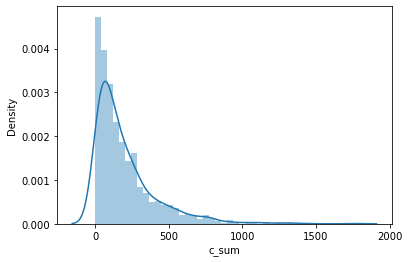

In [20]:
sns.distplot(c_sum) #로그 취하지 않은 사고 수의 히스토그램

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='c_sum', ylabel='Density'>

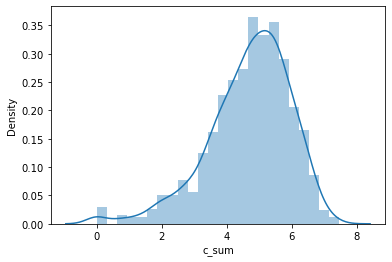

In [21]:
sns.distplot(ln_c)#로그 취한 사고 수의 히스토그램

In [22]:
import scipy.stats as stats
#표본수(n)가 2000 미만인 데이터셋에 적합한 정규성 검정
print(stats.shapiro(c_sum))
print(stats.shapiro(ln_c))

ShapiroResult(statistic=0.7826557159423828, pvalue=1.6842995902430593e-35)
ShapiroResult(statistic=0.9547510147094727, pvalue=1.1043634591455657e-17)


In [23]:
from scipy.stats import normaltest
#왜도와 첨도가 정규분포와 일치하는 지를 판단하는 검정
print(normaltest(c_sum))
print(normaltest(ln_c))

NormaltestResult(statistic=529.4363691583363, pvalue=1.0823137548520943e-115)
NormaltestResult(statistic=141.78495304070037, pvalue=1.628503284249875e-31)


In [24]:
from scipy.stats import kstest
#표본수(n)가 2000 초과인 데이터셋에 적합한 정규성 검정
print(kstest(c_sum, 'norm'))
print(kstest(ln_c, 'norm'))

KstestResult(statistic=0.9809427394334211, pvalue=0.0)
KstestResult(statistic=0.9443443068207573, pvalue=0.0)


In [25]:
# pvalue가 0.05보다 커야 정규성을 띈다고 할 수 있는데, 전부 pvalue가 0에 가깝게 나옴...
# !! 정규성을 따르지 않아도 예측을 할 수 있을까? !!
# !! 카이제곱 분포와 유사한 형태인데, 카이제곱분포인지 아닌지 검정하는 테스트가 있나? !!
# !! 정규성 따를 때까지 라벨링 or 군집화 계속해야 하나?? !!

## 중소형 사건 수 시계열 그래프

In [26]:
y_count0=df[df['clust']==0].groupby('화재발생년월일')['c0'].count().to_frame(name='count0').rename_axis('화재발생년월일').reset_index()
y_count1=df[df['clust']==1].groupby('화재발생년월일')['c1'].count().to_frame(name='count1').rename_axis('화재발생년월일').reset_index()
dateList=df['화재발생년월일'].to_frame(name='화재발생년월일').drop_duplicates(subset=['화재발생년월일'])


In [27]:
dl= pd.merge(dateList, y_count1, left_on='화재발생년월일', right_on='화재발생년월일', how='outer')
dl = pd.merge(dl, y_count0, left_on='화재발생년월일', right_on='화재발생년월일', how='outer').fillna(method='ffill')

In [28]:
#결측치는 전 값으로 대체
dl['count1']=dl['count1'].fillna(method='bfill')
dl['count0']=dl['count0'].fillna(method='bfill')


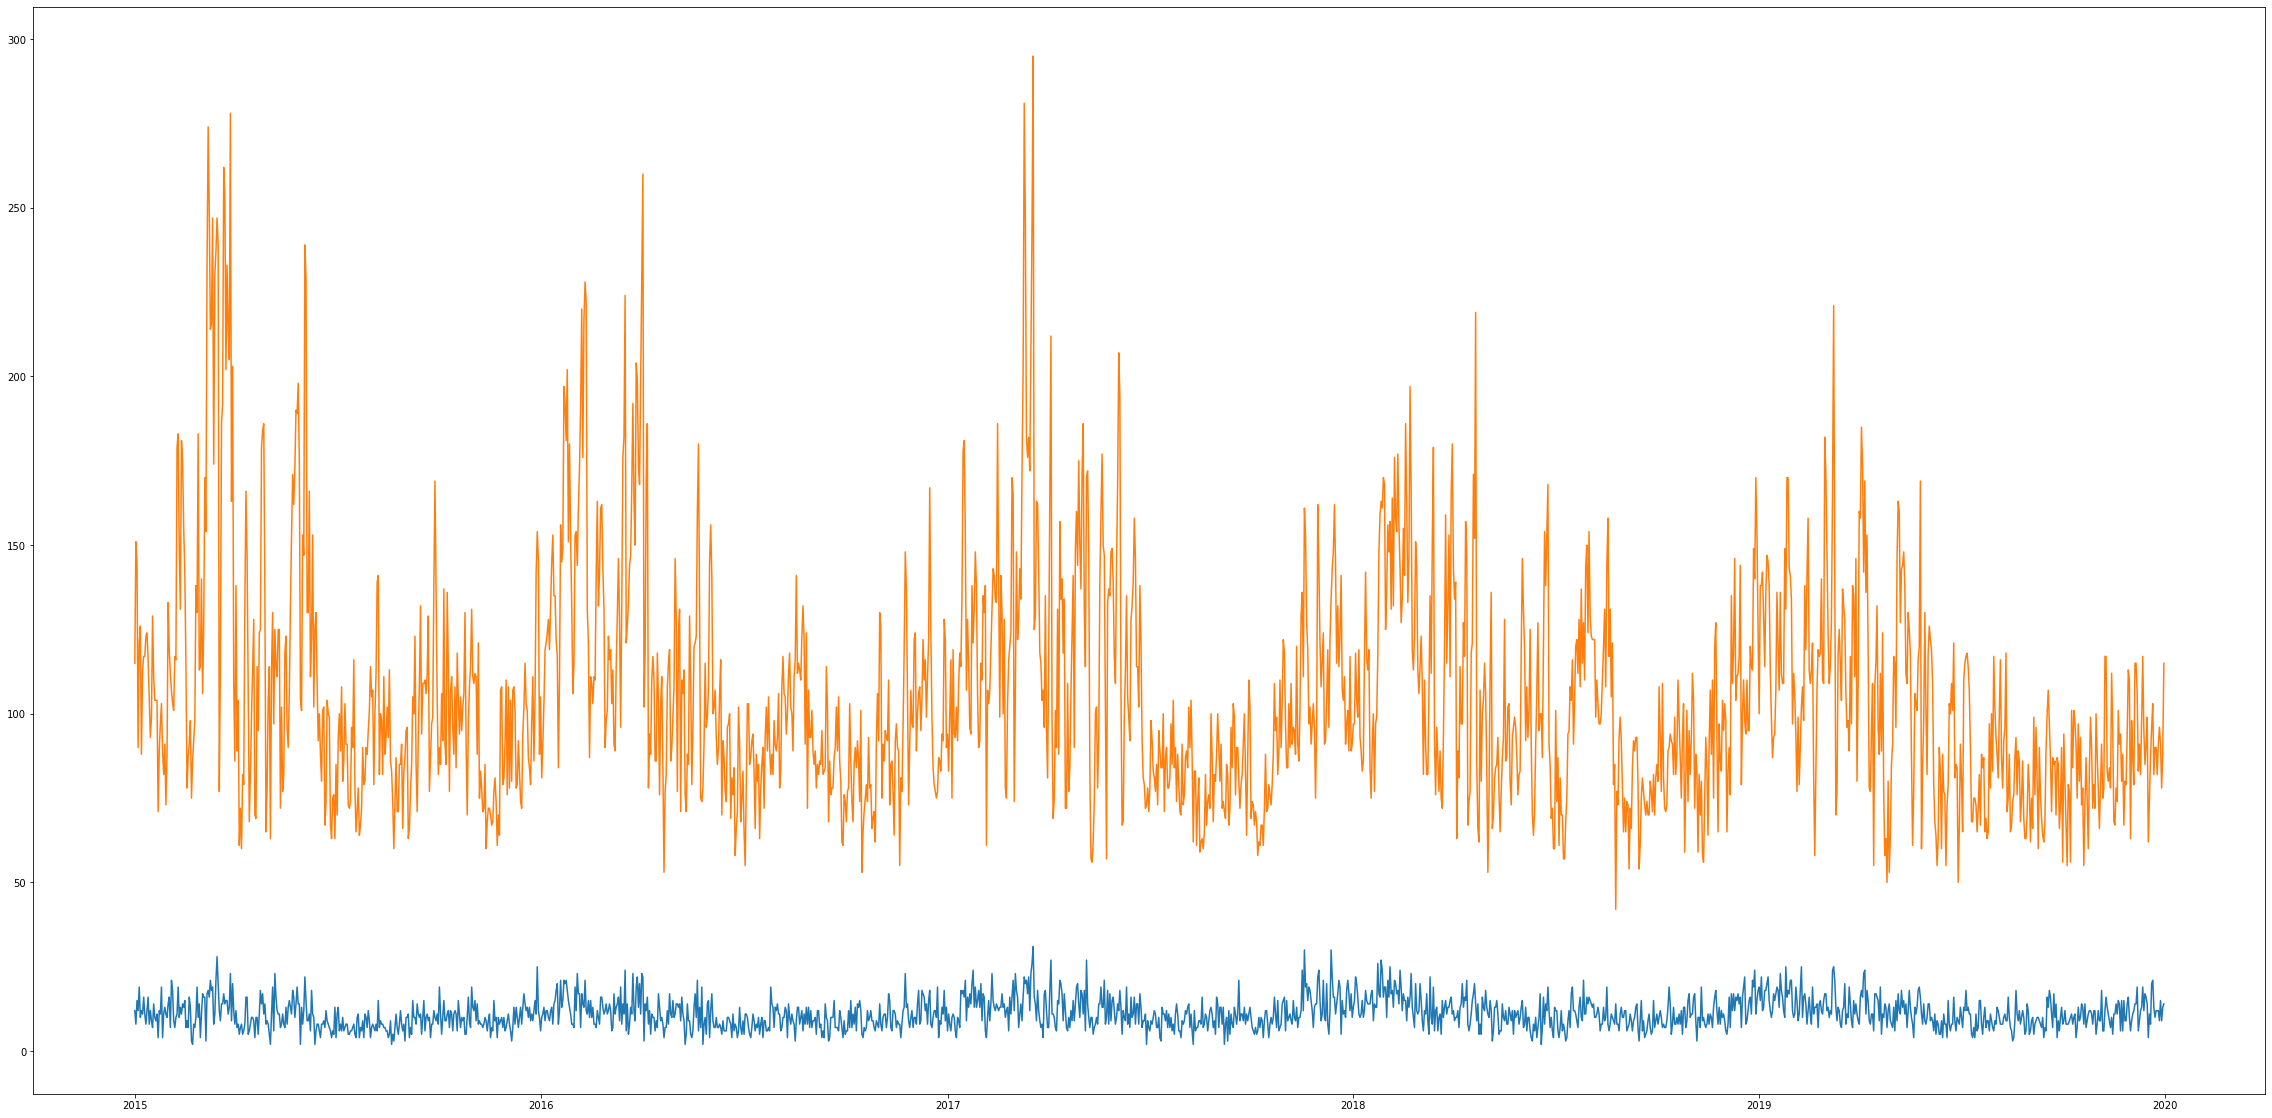

In [29]:
plt.figure(figsize=(40,20))
plt.plot(dl['화재발생년월일'], dl['count1'])
plt.plot(dl['화재발생년월일'], dl['count0'])
plt.show()

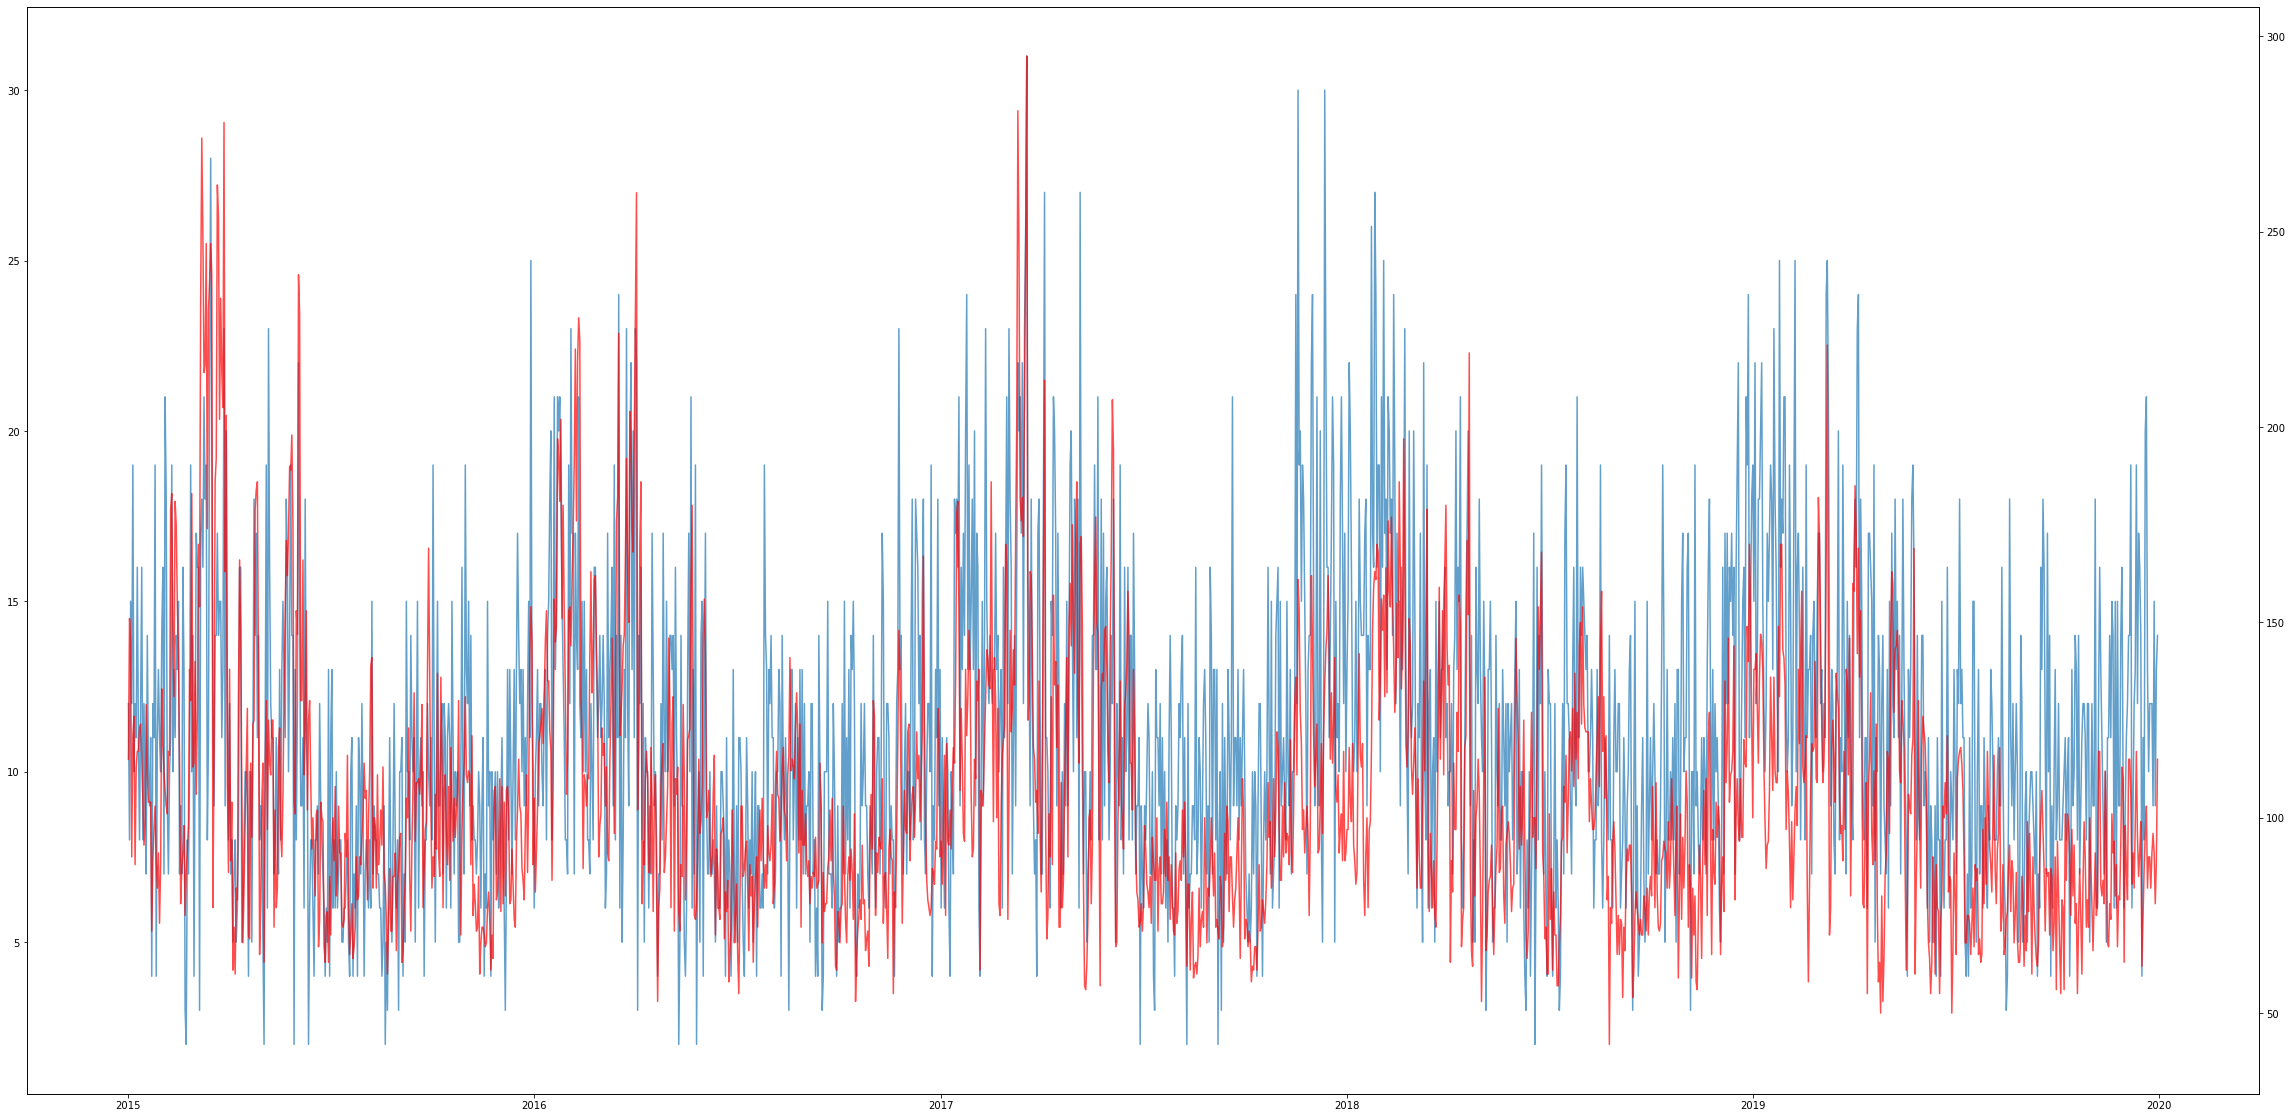

In [141]:

# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
fig.set_size_inches(40, 20, forward=True)
ax1.plot(dl['화재발생년월일'], dl['count1'],  alpha = 0.7)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(dl['화재발생년월일'], dl['count0'], color = 'r',alpha = 0.7)
plt.show()

## 초대형 화재가 발생한 뒤, 다음 초대형 사고가 발생할 때까지 걸린 시간의 자기상관계수

### 자기상관계수 이론적 내용: https://rfriend.tistory.com/528
### 코드 참고: https://aliencoder.tistory.com/9?category=520865 / https://wikidocs.net/104845


In [95]:
#초대형 사고 사이의 시간
def wannaDay(x):
    return x.days
diff=df[df['clust']==2]['diff'].apply(wannaDay)
diff
# diff.iloc[:,1].apply(wannaDay)

63        0
260       1
133       0
604       3
891       2
         ..
213699    2
213646    0
213639    0
213745    1
213907    1
Name: diff, Length: 1073, dtype: int64

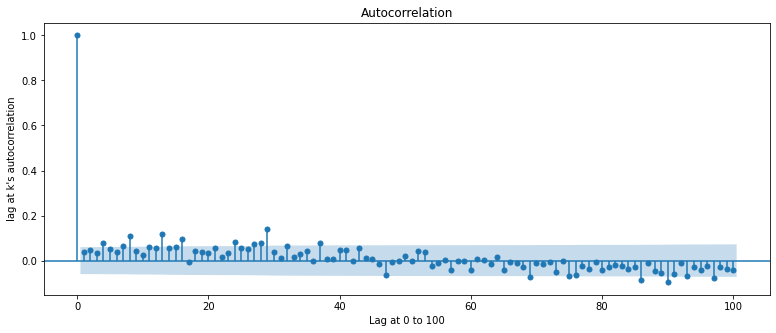

In [131]:
def acf_plot(data, N_LAGS, alpha):
    from statsmodels.graphics.tsaplots import plot_acf    
    fig = plot_acf(data, lags=N_LAGS, alpha=alpha)    
    fig.set_size_inches(13, 5, forward=True)
    plt.xlabel(f'Lag at 0 to {N_LAGS}')
    plt.ylabel("lag at k's autocorrelation") 
    plt.show()
    
    
acf_plot(diff, 100, 0.05)

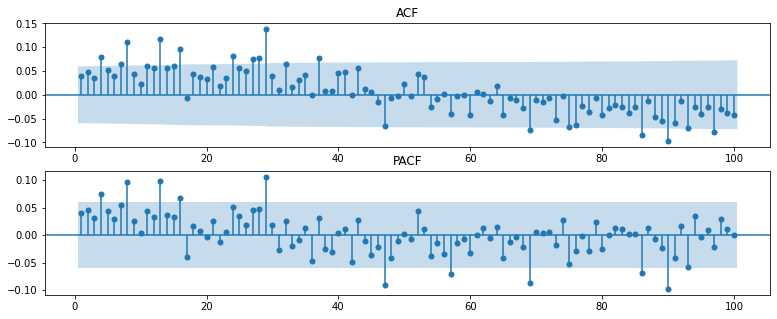

In [135]:
import statsmodels.graphics.tsaplots as sgt 
# ACF 와 PACF 비교
fig = plt.figure()
fig.set_size_inches(13, 5, forward=True)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(diff, lags = 100, zero = False, ax=ax1)
ax1.set_title("ACF")


sgt.plot_pacf(diff, lags = 100, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF")

plt.show()

In [32]:
# df.to_excel('15-19_death10_df.xlsx')